# Part I - (Ford GoBike Dataset Exploration)
## by (Waleed Alhumizi)

## Introduction

#### **This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.**

## **Contents**

>**Introduction**

>**Preliminary Wrangling**

>**Univariate Exploration**

>**Bivariate Exploration**

>**Multivariate Exploration**

>**Conclusions**

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# Loading the csv file
df = pd.read_csv("fordgobike.csv")

In [3]:
# see it's shape
df.shape

(183412, 16)

In [4]:
# general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# see description of the dataframe
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000000        104.000000               37.780760   
75%       796.000000        239.000000               37.797280   
max     85444.000000        398.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count            183412.000000   183215.000000         183412.000000   
mean               -122.352664      136.249123             37.771427   
std                   0.117097      111.515131              0.099490   
min                -122.453704        3.000000             37.317298   
25%                -122.412408       44.000000             37.770407   
50%                -122.398285      100.000000             37.781010   
75%                -122.286533      235.000000             37.797320   
max                -121.874119      398.000000             37.880222   

       end_station_longitude        bike_id  member_birth_year  
count          183412.000000  183412.000000      175147.000000  
mean             -122.352250    4472.906375        1984.806437  
std                 0.116673    1664.383394          10.116689  
min              -122.453704      11.000000        1878.000000  
25%              -122.411726    3777.000000        1980.000000  
50%              -122.398279    4958.000000        1987.000000  
75%              -122.288045    5502.000000        1992.000000  
max              -121.874119    6645.000000        2001.000000

In [6]:
# dsiaply the head rows to better understanding the variables
df.head()

duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13.0   
1               37.791464              -122.391034            81.0   
2               37.769305              -122.426826             3.0   
3               37.774836              -122.446546            70.0   
4               37.804562              -122.271738           222.0   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
1                            Berry St at 4th St             37.775880   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer             1984.0   
1            -122.393170     2535    Customer                NaN   
2            -122.404904     5905    Customer             1972.0   
3            -122.444293     6638  Subscriber             1989.0   
4            -122.248780     4898  Subscriber             1974.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3         Other                      No  
4          Male                     Yes

### ***Missing and Duplicated Values***

***Some columns contains missing values which are going to dropped***

In [7]:
# check for any duplicates
df.duplicated().sum()

0

In [8]:
# check for missing values by using isnull() and sum()
print('duration_sec missing values: ', df['duration_sec'].isnull().sum())
print('start_time mssing values: ', df['start_time'].isnull().sum())
print('end_time missing values: ', df['end_time'].isnull().sum())
print('start_station_id missing values: ', df['start_station_id'].isnull().sum())
print('start_station_name missing values: ', df['start_station_name'].isnull().sum())
print('start_station_latitude missing values: ', df['start_station_latitude'].isnull().sum())
print('start_station_longitude missing values: ', df['start_station_longitude'].isnull().sum())
print('end_station_id missing values: ', df['end_station_id'].isnull().sum())
print('end_station_name missing values: ', df['end_station_name'].isnull().sum())
print('end_station_latitude missing values: ', df['end_station_latitude'].isnull().sum())
print('end_station_longitude missing values: ', df['end_station_longitude'].isnull().sum())
print('bike_id missing values: ', df['bike_id'].isnull().sum())
print('user_type missing values: ', df['user_type'].isnull().sum())
print('member_birth_year missing values: ', df['member_birth_year'].isnull().sum())
print('member_gender missing values: ', df['member_gender'].isnull().sum())
print('bike_share_for_all_trip missing values: ', df['bike_share_for_all_trip'].isnull().sum())

duration_sec missing values:  0
start_time mssing values:  0
end_time missing values:  0
start_station_id missing values:  197
start_station_name missing values:  197
start_station_latitude missing values:  0
start_station_longitude missing values:  0
end_station_id missing values:  197
end_station_name missing values:  197
end_station_latitude missing values:  0
end_station_longitude missing values:  0
bike_id missing values:  0
user_type missing values:  0
member_birth_year missing values:  8265
member_gender missing values:  8265
bike_share_for_all_trip missing values:  0


### ***Checking the variables types***

> **To datetime type:** "start_time" and "end_time".

> **To category type:** "bike_share_for_all_trip", "member_gender" and "user_type". 

> **To integer type:** "start_station_id", "end_station_id" and "member_birth_year".

In [9]:
# it seems that there is some wrong data types
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [10]:
# discover the number of unique values to change them into categorical type
print('number of unique values in bike_share_for_all_trip is: ', df['bike_share_for_all_trip'].nunique())
print('number of unique values in member_gender is: ', df['member_gender'].nunique())
print('number of unique values in user_type is:', df['user_type'].nunique())

number of unique values in bike_share_for_all_trip is:  2
number of unique values in member_gender is:  3
number of unique values in user_type is: 2


### ***Apply the cleaning steps***

In [11]:
# drop missing values in the columns that contains it
df = df.dropna(subset=['start_station_id', 'start_station_name', 'end_station_id',
                      'end_station_name', 'member_birth_year', 'member_gender'])

In [12]:
# check
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [13]:
# change the dtypes

# start_time and end_time into datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# change these three columns into cateogrical type
df[['bike_share_for_all_trip', 'member_gender', 'user_type']] = df[['bike_share_for_all_trip', 'member_gender', 'user_type']].astype('category')

# change these three columns to intger type
df[['start_station_id', 'end_station_id', 'member_birth_year']] = df[['start_station_id', 'end_station_id', 'member_birth_year']].astype('int64')

In [14]:
# check
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                   int64
member_gender                    category
bike_share_for_all_trip          category
dtype: object

### ***Add a new column***

***member_age column will help me to answer questions, and it is easy to add, let's do it!***

In [15]:
# add member_age column and cast to int type
# the data is only contains fubruary 2019 info
df["member_age"] = (2019 - df.member_birth_year).astype(int)

In [16]:
# check it's head
df['member_age'].head()

0    35
2    47
3    30
4    45
5    60
Name: member_age, dtype: int32

In [17]:
df.shape

(174952, 17)

**This column contains good number of ages that is above 88 years, which are outliers.**

**I'll drop every row that is above 88 in the column "member_age".**

In [18]:
# when print the value counts for member_age, we see members are too much old to ride a bike
# we cannot say it's not real, but removing it will not make too much different in the dataset
# somewhat suspicious ...
df['member_age'].value_counts().sort_index(ascending=False).head(10)

member_age
141     1
119    53
118     6
117    11
109     1
99      3
92      1
91      1
89      1
88     89
Name: count, dtype: int64

In [19]:
# let's drop them by specify the rows that is only lower than 89 years
df = df[df['member_age'] < 89]

In [20]:
# it's better now
# check
df['member_age'].value_counts().sort_index(ascending=False).head(10)

member_age
88     89
86     20
85      2
81      3
80     11
78      9
77     21
76     30
75      2
74    105
Name: count, dtype: int64

In [21]:
# the new shape after the modify
df.shape

(174874, 17)

In [22]:
# it's clean and ready to being explored using visualizations for my report purpose
df.head()

duration_sec              start_time                end_time  \
0         52185 2019-02-28 17:32:10.145 2019-03-01 08:01:55.975   
2         61854 2019-02-28 12:13:13.218 2019-03-01 05:24:08.146   
3         36490 2019-02-28 17:54:26.010 2019-03-01 04:02:36.842   
4          1585 2019-02-28 23:54:18.549 2019-03-01 00:20:44.074   
5          1793 2019-02-28 23:49:58.632 2019-03-01 00:19:51.760   

   start_station_id                                start_station_name  \
0                21  Montgomery St BART Station (Market St at 2nd St)   
2                86                           Market St at Dolores St   
3               375                           Grove St at Masonic Ave   
4                 7                               Frank H Ogawa Plaza   
5                93                      4th St at Mission Bay Blvd S   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811              13   
2               37.769305              -122.426826               3   
3               37.774836              -122.446546              70   
4               37.804562              -122.271738             222   
5               37.770407              -122.391198             323   

                               end_station_name  end_station_latitude  \
0                Commercial St at Montgomery St             37.794231   
2  Powell St BART Station (Market St at 4th St)             37.786375   
3                        Central Ave at Fell St             37.773311   
4                         10th Ave at E 15th St             37.792714   
5                            Broadway at Kearny             37.798014   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.402923     4902    Customer               1984   
2            -122.404904     5905    Customer               1972   
3            -122.444293     6638  Subscriber               1989   
4            -122.248780     4898  Subscriber               1974   
5            -122.405950     5200  Subscriber               1959   

  member_gender bike_share_for_all_trip  member_age  
0          Male                      No          35  
2          Male                      No          47  
3         Other                      No          30  
4          Male                     Yes          45  
5          Male                      No          60

### **Save the clean copy**

In [23]:
# .to_csv will save the current cleand data into csv file
df.to_csv("fordgobike_cleaned.csv", index=False)

### What is the structure of your dataset?

> It contains **183,412** rows and **16** columns, and after the clean it becomes **174,874** rows and **17** columns.

- duration_sec
- start_time
- end_time
- start_station_id
- start_station_name
- start_station_latitude
- start_station_longitude
- end_station_id
- end_station_name
- end_station_latitude
- end_station_longitude
- bike_id
- user_type
- member_birth_year
- member_gender
- bike_share_for_all_trip
- member_age


### What is/are the main feature(s) of interest in your dataset?

> I think that the most important features in the dataset are "user_type", "member_gender" and "member_age". 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> "start_time", "end_time" and "member_birth_year" will help me through the investigation.

## Univariate Exploration

### ***Q: What is the total number of bike trips per day?***

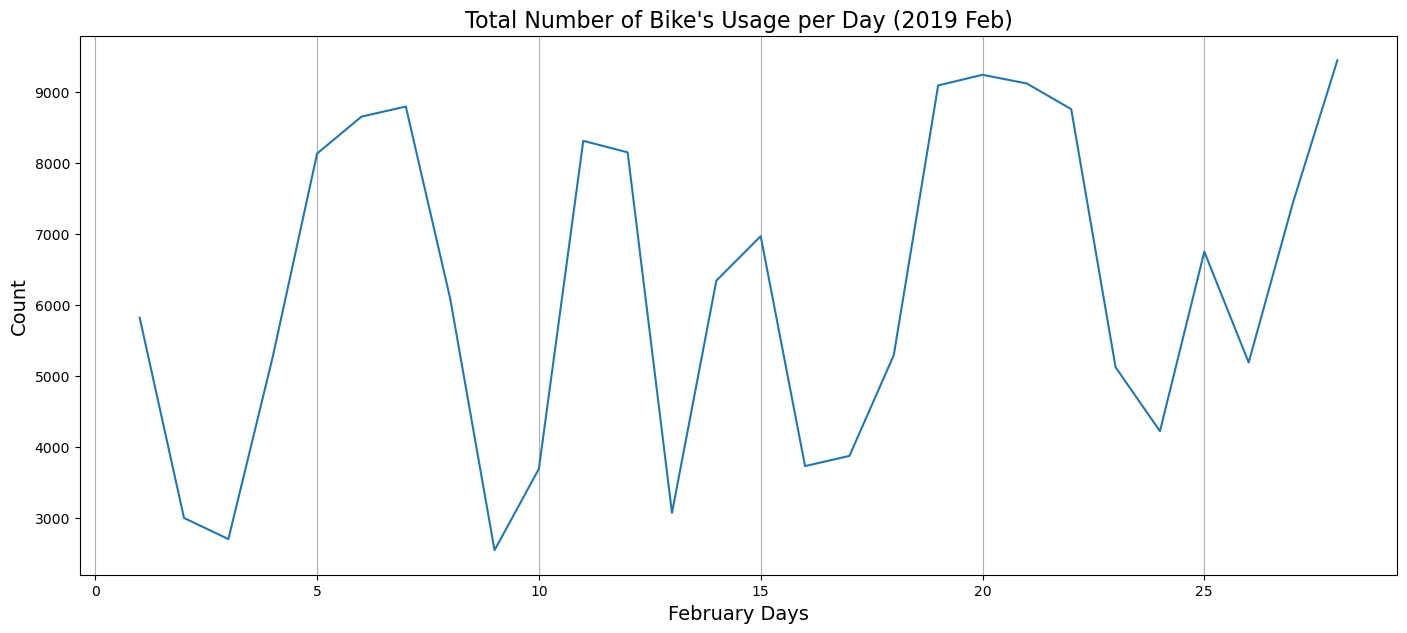

In [56]:
# define a function to set x-axis label, y-axis label, and title for plots
def set_labels_and_title(x_label, y_label, plot_title):
    plt.title(plot_title, fontsize=16)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)
    color = sns.color_palette()[2]  # set the default color


start_time_to_day = df.start_time.dt.day.value_counts().sort_index()

# create a figure with specified size
plt.figure(figsize=(17, 7))

# plot the data
plt.plot(start_time_to_day.index, start_time_to_day.values.tolist())

# add grid lines along the x-axis
plt.grid(axis="x") # vertical lines

# call set_labels_and_title to fill in the title and x,y lables
set_labels_and_title("February Days", "Count", "Total Number of Bike's Usage per Day (2019 Feb)")

### **Observation**
**We can see the totals above in the plot, 28 feb seems the highest total trips.**

### ***Q: Who is the most common gender?***

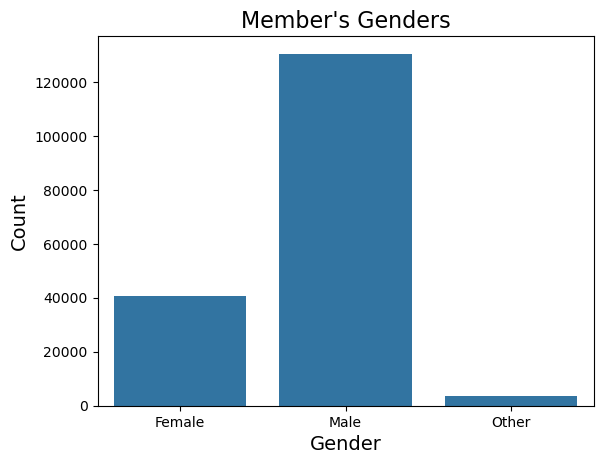

In [57]:
# create a count plot of member genders
sns.countplot(data=df, x="member_gender", color='tab:blue')

# call set_labels_and_title to fill in the title and x,y lables
set_labels_and_title("Gender", "Count", "Member's Genders")

### **Observation**
**It seems that Males are the most common gender rather then Females and others.** 

### ***Q: What is the most common trip duration?*** 

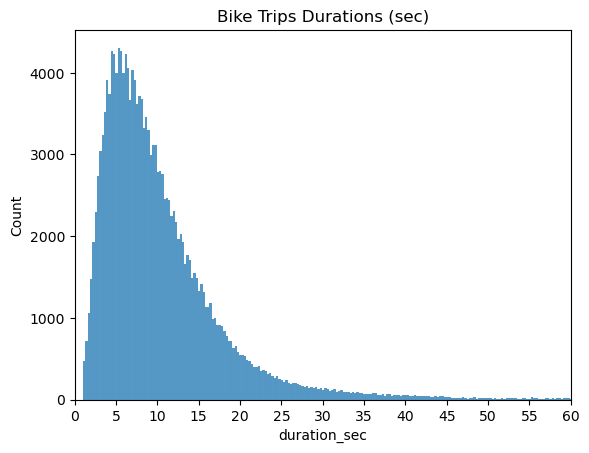

In [43]:
# create a histogram of bike trip durations in seconds
sns.histplot(data=df, x="duration_sec", color='tab:blue')

# set plot title
plt.title("Bike Trips Durations (sec)")

# limit x-axis range to durations less than 1 hour (3600 seconds)
plt.xlim((0, 3600)) # 60*60 = 3600

# set custom ticks and labels for x-axis at intervals of 5 minutes
plt.xticks(np.arange(0, 3600 + 300, 300), np.arange(0, 65, 5));

### **Observation**
**5 to 8 minutes is the most common trip duration according to the plot.**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of the variables is as expected, there wasn't unusual points and there is no need to perform any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In the Member's Genders plot, there was a very little percentage of the gender 'others' but I'll keep it.

## Bivariate Exploration

### ***Q: How can member's age affect user type and gender?***

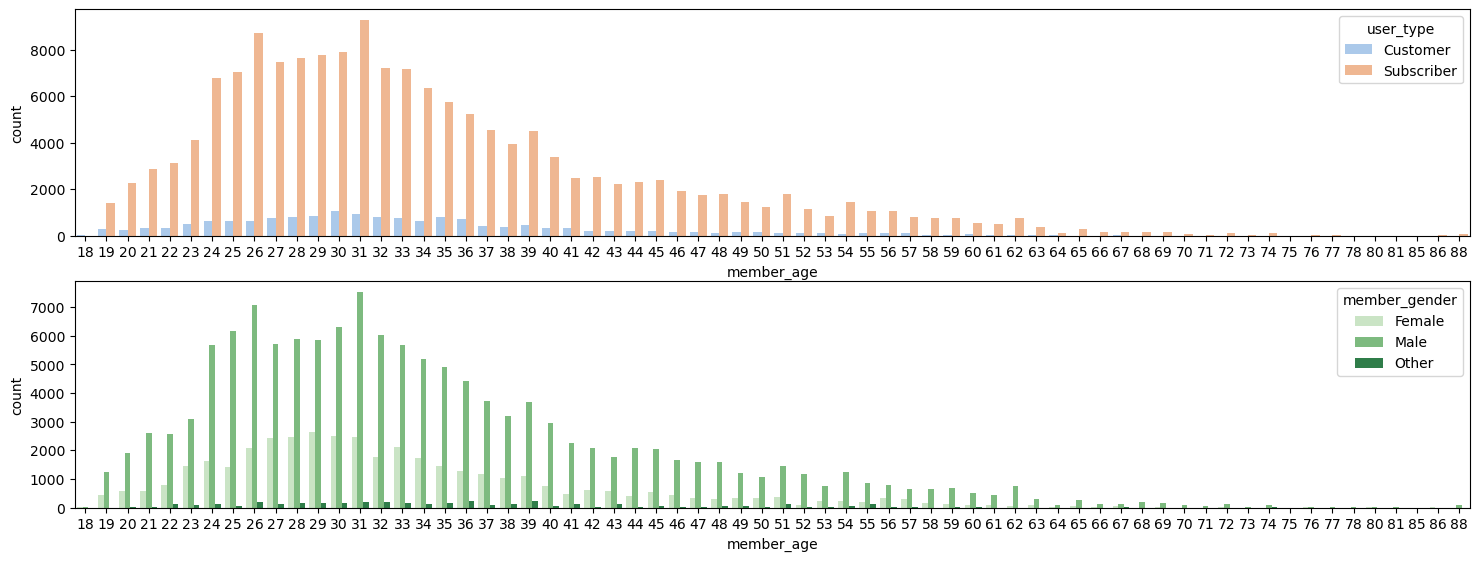

In [44]:
# create a figure with specified size
plt.figure(figsize=(18,10))

# create subplot 1 (top subplot) for count of user types by member age
sp = plt.subplot(3, 1, 1)
sns.countplot(data=df, x="member_age", hue="user_type", palette="pastel")

# create subplot 2 (second subplot) for count of member genders by member age
plt.subplot(3, 1, 2)
sp = sns.countplot(data=df, x="member_age", hue="member_gender", palette="Greens")

### **Observation**

**We can see in the first plot that the subscribers and customers ages between 24 to 36 is greater than the other ages.**

**In the second plot also the same ages is greater than the other ages in both genders, but the males is much greater.**

### ***Q: What is start and end stations groups like?***

<Figure size 640x480 with 0 Axes>

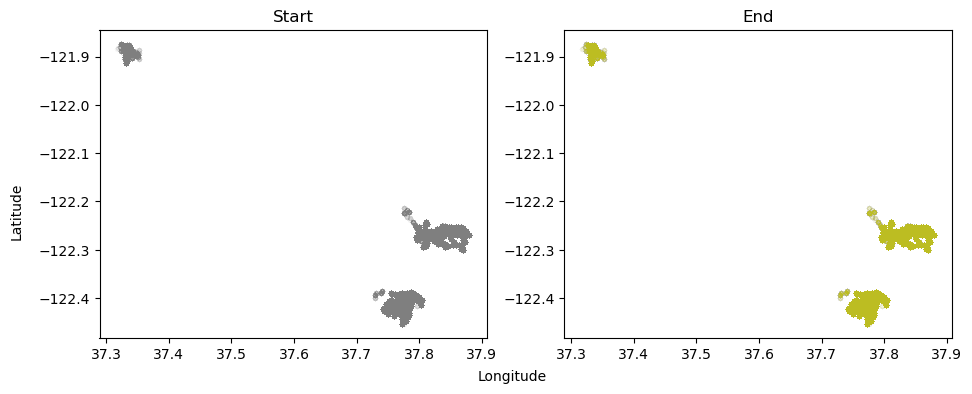

In [49]:
# create a new figure
plt.figure()

# create a figure with two subplots side by side
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(11, 4))

# scatter plot for start station latitude and longitude
ax0.scatter(x="start_station_latitude", y="start_station_longitude", data=df, alpha=0.01, marker=".", c="tab:gray",)

# scatter plot for end station latitude and longitude
ax1.scatter(x="end_station_latitude", y="end_station_longitude", data=df, alpha=0.01, marker=".",c="tab:olive",)

# set titles for each subplot
ax0.set_title("Start")
ax1.set_title("End")

# set x-axis label for the whole figure
fig.text(0.5, 0.03, "Longitude", ha="center", va="top")

# set y-axis label for the whole figure
fig.text(0.05, 0.5, "Latitude", ha="center", va="top", rotation='vertical');

### **Observation**

**Divided to three groups and it's kind of similar between others.**

### ***Q: What is the relation between age and gender?***

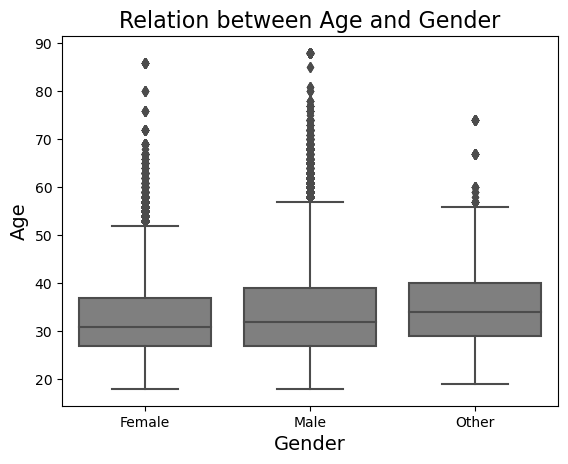

In [58]:
# create a box plot of member age by gender
sns.boxplot(data=df, y='member_age', x='member_gender', color='tab:gray')

# call set_labels_and_title to fill in the title and x,y lables
set_labels_and_title("Gender", "Age", "Relation between Age and Gender")

# show the plot
plt.show()

### **Observation**

**The relation is strong when the ages between 26 to 40.**

**The outliers are normal, I'll keep them.**

### ***Q: What is the relationships between 'duration_sec', 'member_age', 'start_station_latitude', and 'start_station_longitude' ?***

C:\Users\enter\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


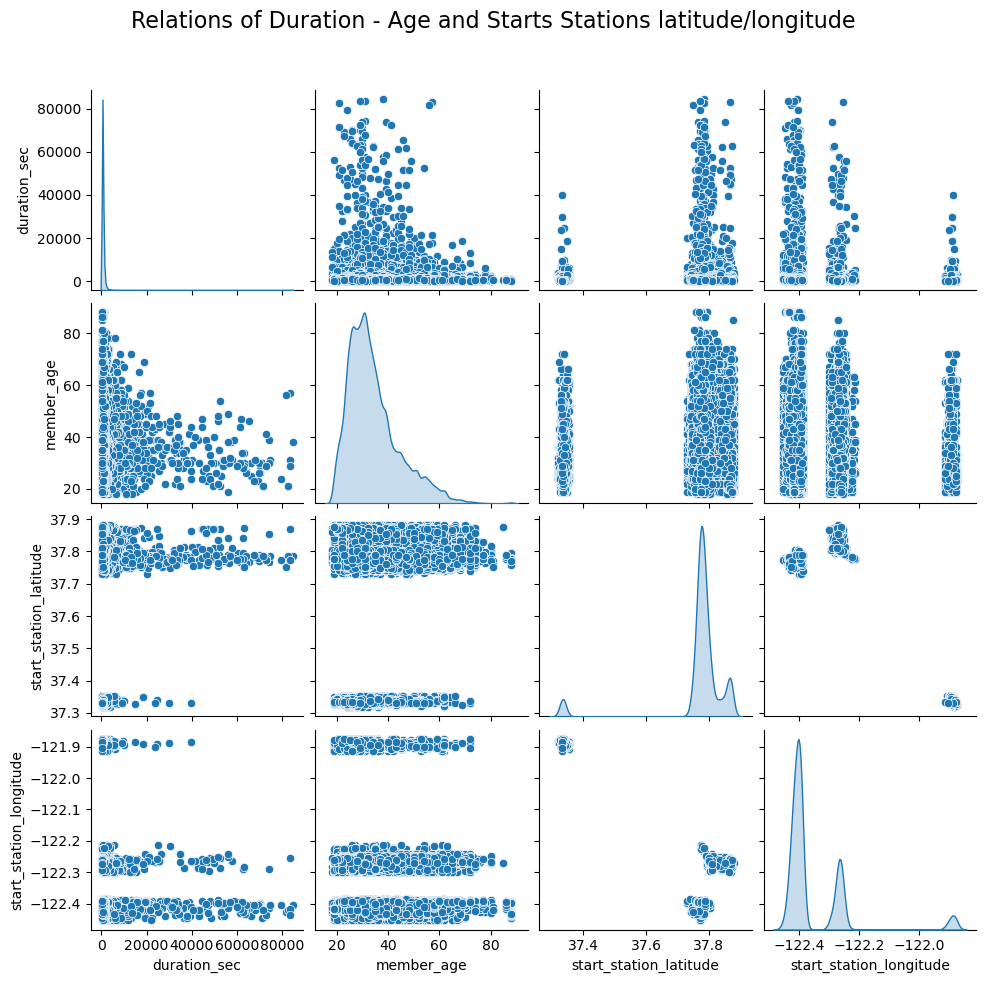

In [51]:
# create a pairplot of selected numerical variables
sns.pairplot(df[['duration_sec', 'member_age', 'start_station_latitude', 'start_station_longitude']], diag_kind='kde')

# set super title
plt.suptitle('Relations of Duration - Age and Starts Stations latitude/longitude', fontsize=16)

# sdjust subplot layout
plt.subplots_adjust(top=0.9)

# show the plot
plt.show()

### ***Q: What is the relations between the numerical variables?***

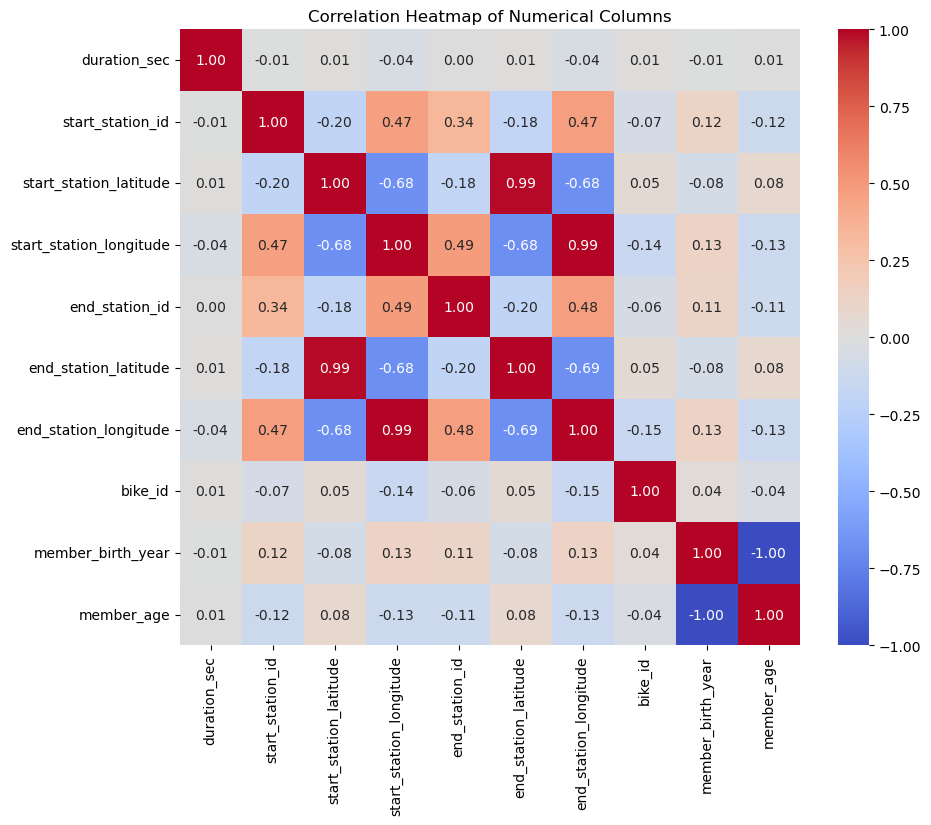

In [52]:
# select numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include='number')

# create a figure with specified size
plt.figure(figsize=(10, 8))

# create a heatmap of the correlation matrix of numerical columns
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# set plot title
plt.title('Correlation Heatmap of Numerical Columns')

# show the plot
plt.show()

### **Observation**

**There is actually number of strong relations between these nummerical values.**

**Start and End columns have very strong relations.**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I've noticed that the member ages between 24 - 40 is the most active in this dataset, Males are more active also than females when the ages comes between 24 - 40. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I've discoverd that there are three groups in the start and end stations!,  they're also similar to each other in both stations.

> Something intersting about the columns end_station_id and start_station longitude, they have strong correlation, and there is similar strong relations as shown above in the heatmap.

## Multivariate Exploration

### ***Q: What is the relation between the duration, gender, user type and his age?***

C:\Users\enter\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


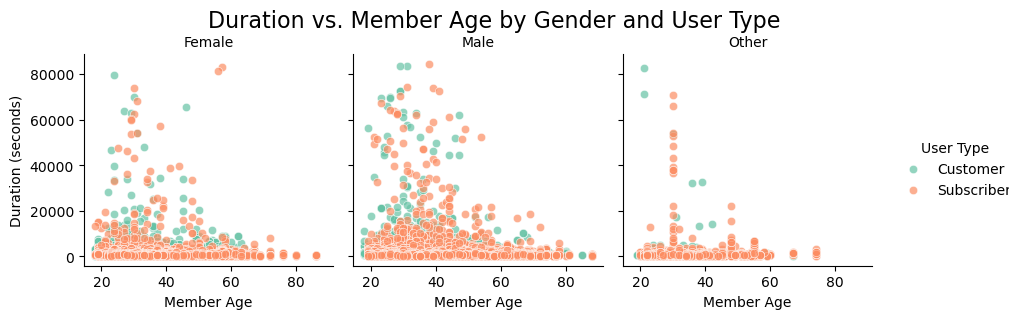

In [53]:
# sreate a FacetGrid with columns based on member gender and hue based on user type
facet = sns.FacetGrid(df, col='member_gender', hue='user_type', palette='Set2')

# map scatterplot of member age versus duration_sec onto each facet
facet.map(sns.scatterplot, 'member_age', 'duration_sec', alpha=0.7)

# add legend to the facets
facet.add_legend()

# adjust subplot layout to make room for the super title
plt.subplots_adjust(top=0.9)

# set super title for the entire plot
plt.suptitle('Duration vs. Member Age by Gender and User Type', fontsize=16, y=1.05)

# set axis labels for each facet
facet.set_axis_labels("Member Age", "Duration (seconds)")

# set titles for each facet based on member gender
facet.set_titles(col_template="{col_name}")

# set title for the legend
facet._legend.set_title('User Type')

# set legend position
facet._legend.set_bbox_to_anchor([1, 0.5])

# show the plot
plt.show()

### **Observation**

**Between these four variables we can see the duration is the most at 0 - 20,000 (sec), and the susbcripers number is more than customers.**

**For the age and gender, I've talked about them before.**

### ***Q: How does the duration of trips correlate with start stations and member gender?***

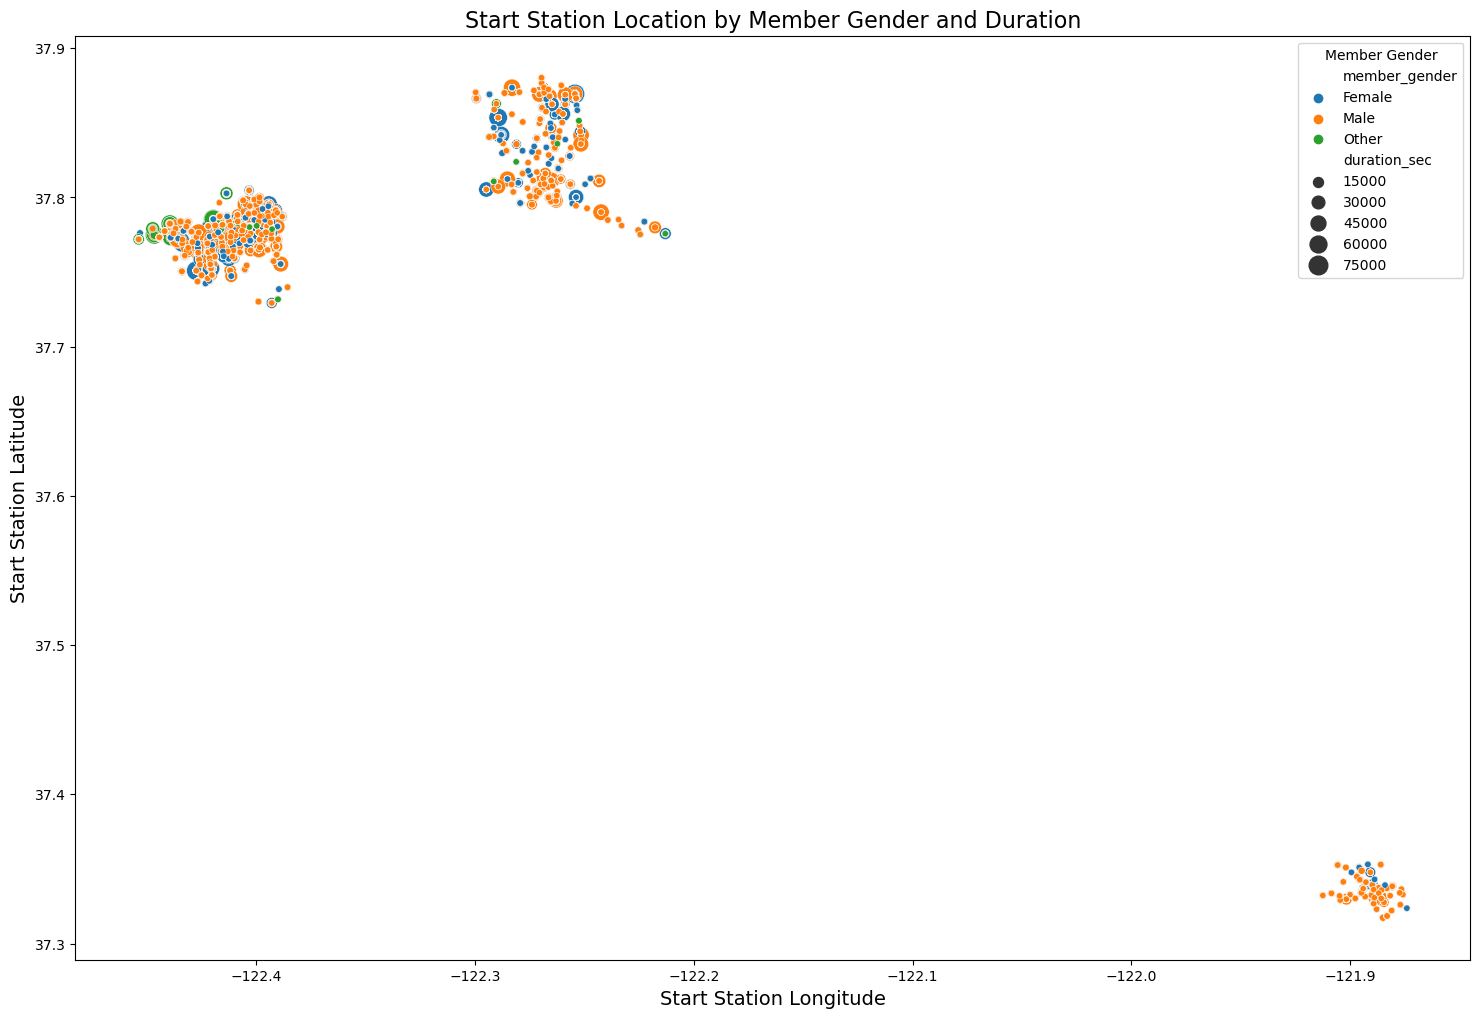

In [59]:
# create a figure with specified size
plt.figure(figsize=(18,12))

# create a scatter plot of start station location with member gender and duration encoded
sns.scatterplot(data=df, x='start_station_longitude', y='start_station_latitude', hue='member_gender', size='duration_sec', sizes=(20, 200))

# call set_labels_and_title to fill in the title and x,y lables
set_labels_and_title("Start Station Longitude", "Start Station Latitude", "Start Station Location by Member Gender and Duration")

# add legend with title for member gender
plt.legend(title='Member Gender')

# show the plot
plt.show()

### **Observation**

**When the Longitude station and Latitude Station comes at (-122.4, 37.7 - 37.8) we can see that the Males are the most in this point, and it contains long durations rather than other points.** 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Longitude and Latitude Start Stations have relation with member's gender and duration. The point (-122.4, 37.7 - 37.8) in the second plot, describe how is the relations between these columns.

### Were there any interesting or surprising interactions between features?

> The subscribers are more than customers. The duaration between 0 - 20,000 seconds is the most active point.

## Conclusions
> In this report, I've wrangled and cleaning the dataset, then complete the three types of visualization which are univariate, bivariate and multivariate using seaborn and matplotlib, 
I've discoverd the relationships bwteen the columns weather categorical, floats, or integers using scatterplots, heatmap and box blot. I've discoverd some insights, asking qeustions then visualizing then write the observations. This report can be helpful for decision-making.

**Most important findings:**

- Males are the most gender in the dataset.
- The total tumber of tike trips per day was in 28 feb 2019.
- Subscripers are more than customers.
- ages between 24 - 40 is the most active.
- 5 to 8 minutes is the most common trip duration

In [34]:
# this will svae this ipynb as html file
!python -m nbconvert --to html Part_I_Exploration_FordGoBike.ipynb

[NbConvertApp] Converting notebook Part_I_Exploration_FordGoBike.ipynb to html
[NbConvertApp] Writing 1560159 bytes to Part_I_Exploration_FordGoBike.html
